In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import gurobi_logtools as glt

In [2]:
name = "Track_k_e_2_reruns"
PATH = f".\Experiments\{name}\Logs"

In [3]:
result = glt.parse(PATH+"\*.log")
summary = result.summary()


In [4]:

nl = result.progress("nodelog")
print(nl[~nl['Incumbent'].isna()])
nl.head()

c:\Users\sian_\OneDrive\Documents\Thesis\MILP_Formulation\pyomo_env\lib\site-packages\gurobi_logtools\api.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  left=pd.concat(progress),


      CurrentNode  RemainingNodes      Obj  Depth  IntInf  Incumbent  \
309         41072          2475.0      NaN    NaN     NaN   0.000979   
310         48503          2783.0      NaN   40.0     NaN   0.000980   
311         48825          2749.0      NaN    NaN     NaN   0.000925   
312         49687          2812.0      NaN    NaN     NaN   0.000925   
313         55406          3661.0  0.00084   54.0    44.0   0.000930   
...           ...             ...      ...    ...     ...        ...   
6833      1070354         80486.0      NaN    NaN     NaN   0.000214   
6834      1077338         80835.0  0.00021   77.0    44.0   0.000210   
6835      1091366         51955.0      NaN    NaN     NaN   0.000207   
6836      1091373         36764.0      NaN    NaN     NaN   0.000206   
6837      1091379             NaN      NaN    NaN     NaN   0.000206   

        BestBd       Gap  ItPerNode    Time  \
309   0.000210  0.790000       37.2   12.00   
310   0.000210  0.790000       37.3   15.

,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,LogFilePath,LogNumber,Pruned,NewSolution,Seed,Version
0,0,0.0,0.00021,0.0,44.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2
1,0,0.0,0.00021,0.0,74.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2
2,0,0.0,0.00021,0.0,90.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2
3,0,0.0,0.00021,0.0,93.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2
4,0,0.0,0.00021,0.0,91.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2


In [5]:
regex_pattern = r'_r(\d+)_c(\d+)\.log'
nl[['Repetition', 'Config']] = nl['LogFilePath'].str.extract(regex_pattern)
nl.head()

,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,LogFilePath,LogNumber,Pruned,NewSolution,Seed,Version,Repetition,Config
0,0,0.0,0.00021,0.0,44.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2,1,4
1,0,0.0,0.00021,0.0,74.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2,1,4
2,0,0.0,0.00021,0.0,90.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2,1,4
3,0,0.0,0.00021,0.0,93.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2,1,4
4,0,0.0,0.00021,0.0,91.0,NaN,0.00021,NaN,NaN,0.0,.\Experiments\Track_k_e_2_reruns\Logs\Track_k_...,1,NaN,NaN,0,11.0.2,1,4


In [6]:
grouped_nl = nl.groupby(['Config', 'Time']).agg({
    'Incumbent': ['mean', 'std'],
    'BestBd': ['mean', 'std']
}).reset_index()

configs = grouped_nl['Config'].unique()
grouped_nl.head()

Config  Time Incumbent        BestBd     
                    mean std      mean  std
0      1  0.00       NaN NaN  0.000210  0.0
1      1  0.11       NaN NaN  0.000206  NaN
2      1  0.12       NaN NaN  0.000206  NaN
3      1  0.13       NaN NaN  0.000206  NaN
4      1  0.14       NaN NaN  0.000206  NaN

In [7]:
grouped_nl.columns = ['Config', 'Time', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']
grouped_nl.head()

,Config,Time,Incumbent_mean,Incumbent_std,BestBd_mean,BestBd_std
0,1,0.00,NaN,NaN,0.000210,0.0
1,1,0.11,NaN,NaN,0.000206,NaN
2,1,0.12,NaN,NaN,0.000206,NaN
3,1,0.13,NaN,NaN,0.000206,NaN
4,1,0.14,NaN,NaN,0.000206,NaN


In [12]:
combinations = {
    'All': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 1},
    'No_MC': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 0},
    'I_only': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 0, 'MHA_MC': 0},
    'LN_only': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
    'Prop_MC': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 1},
    'LN_prop': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 0},
    'None': {'LN_I': 0, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
}


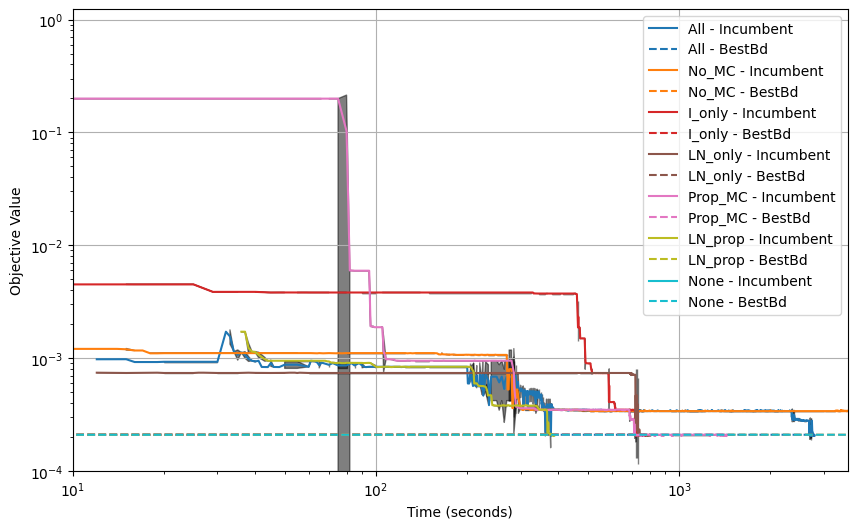

In [34]:
import matplotlib.pyplot as plt

# Initialize the figure size
colors = plt.get_cmap('tab10', len(grouped_nl['Config'].unique()))
config_names = list(combinations.keys())

# Find the global min and max values for both the x and y axes across all configurations
x_min = 10#grouped_nl['Time'].min()
x_max = grouped_nl['Time'].max()

y_min = 1e-4 #min(grouped_nl['Incumbent_mean'].min(), grouped_nl['BestBd_mean'].min())
y_max = max(grouped_nl['Incumbent_mean'].max(), grouped_nl['BestBd_mean'].max())

# Plot each configuration using the same x and y axis limits
for i, config in enumerate(configs):
    plt.figure(i, figsize=(10, 6))
    config_data = grouped_nl[grouped_nl['Config'] == config]
    color = colors(i)

    # Plot Incumbent mean
    plt.plot(config_data['Time'], config_data['Incumbent_mean'], linestyle='-', label=f'{config_names[i]} - Incumbent', color=color)
    #Add shaded area for Incumbent std
    plt.fill_between(config_data['Time'], 
                     config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
                     config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
                     color="black", alpha=0.5)

    # Plot BestBd mean
    plt.plot(config_data['Time'], config_data['BestBd_mean'], linestyle='--', label=f'{config_names[i]} - BestBd', color=color)
    # Add shaded area for BestBd std
    # plt.fill_between(config_data['Time'], 
    #                  config_data['BestBd_mean'] - config_data['BestBd_std'], 
    #                  config_data['BestBd_mean'] + config_data['BestBd_std'], 
    #                  color="black", alpha=0.5)
    # Set to log scale
    plt.yscale('log')
    plt.xscale('log')

    # Set the same x and y limits for all plots
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Add labels
    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Objective Value')
    plt.legend()
    

    # PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
    # plt.savefig(PATH+f'\images\{config_names[i]}_time_conv.png')  
    # #plt.show()
     


In [10]:
grouped_nl2 = nl.groupby(['Config', 'CurrentNode']).agg({
    'Incumbent': ['mean', 'std'],
    'BestBd': ['mean', 'std']
}).reset_index()

configs = grouped_nl2['Config'].unique()
grouped_nl2.columns = ['Config', 'Node', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']
grouped_nl2.head()

,Config,Node,Incumbent_mean,Incumbent_std,BestBd_mean,BestBd_std
0,1,0,NaN,NaN,0.000210,0.0
1,1,1,NaN,NaN,0.000206,0.0
2,1,13250,NaN,NaN,0.000210,NaN
3,1,14302,NaN,NaN,0.000210,NaN
4,1,15007,NaN,NaN,0.000210,NaN


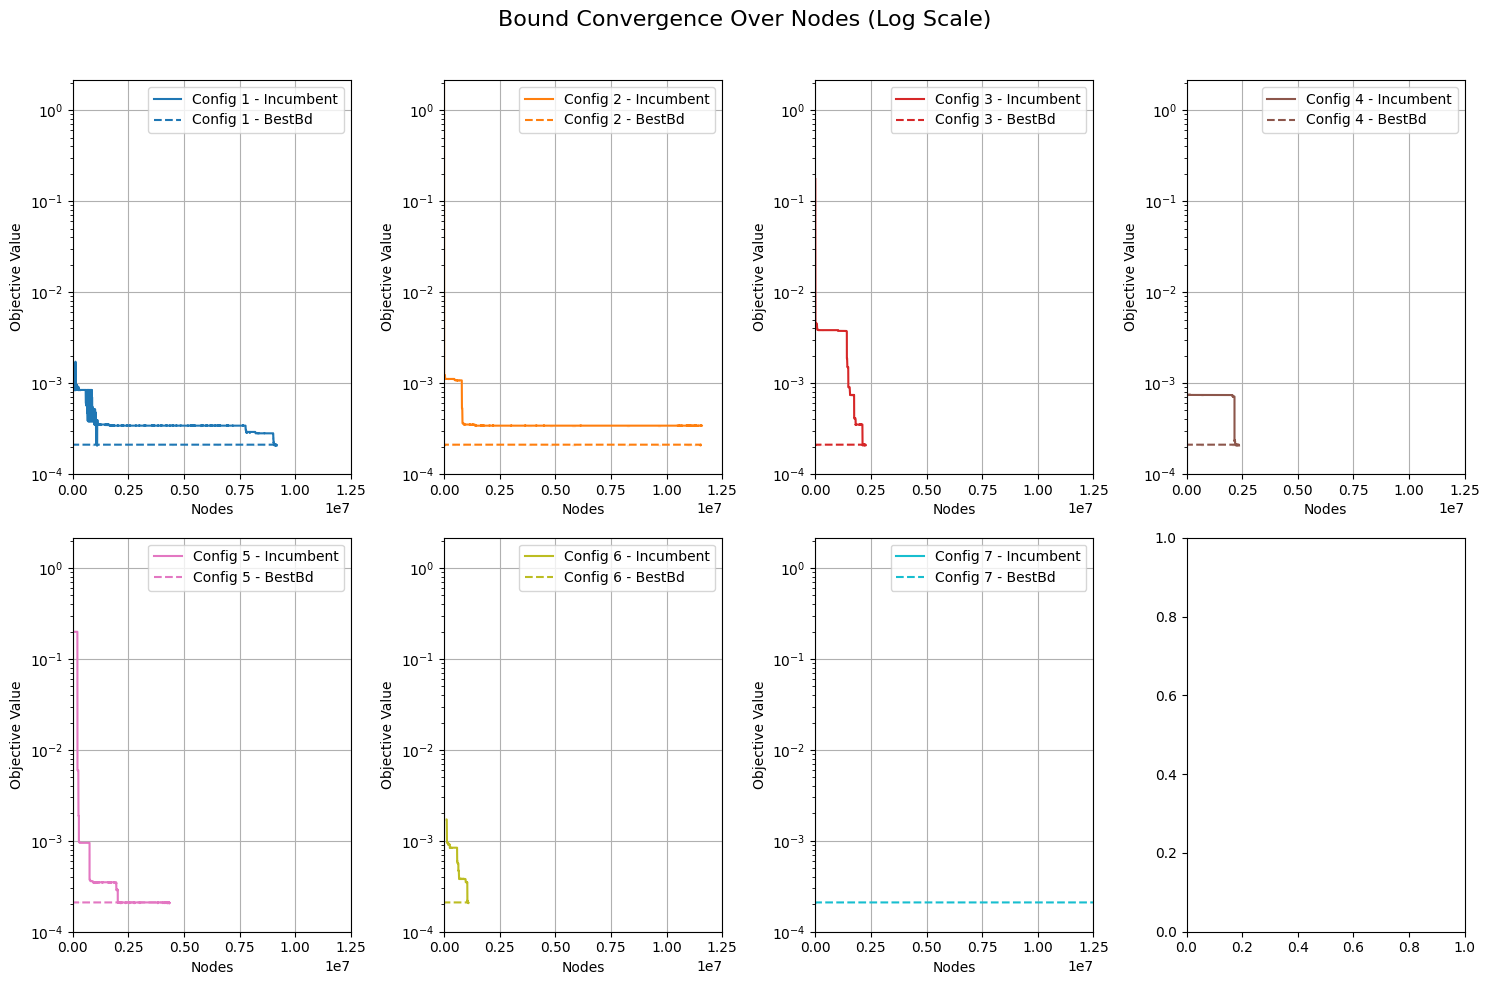

<Figure size 640x480 with 0 Axes>

: 

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the number of subplots based on the number of configurations
num_configs = len(configs)
fig, axes = plt.subplots(nrows=2, ncols=(num_configs + 1) // 2, figsize=(15, 10))  # Adjust subplot grid

# Set the color map for the plots
colors = plt.get_cmap('tab10', num_configs)

# Find the global min and max values for the x and y axes across all configurations
x_min = grouped_nl2['Node'].min()
x_max = 1.25e7
y_min = 1e-4
y_max = max(grouped_nl2['Incumbent_mean'].max(), grouped_nl2['BestBd_mean'].max())

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each configuration in a separate subplot
for i, config in enumerate(configs):
    ax = axes[i]
    config_data = grouped_nl2[grouped_nl2['Config'] == config]
    color = colors(i)

    # Plot Incumbent mean
    ax.plot(config_data['Node'], config_data['Incumbent_mean'], label=f'Config {config} - Incumbent', color=color)
    # Add shaded area for Incumbent std
    ax.fill_between(config_data['Node'], 
                    config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
                    config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
                    color=color, alpha=0.2)

    # Plot BestBd mean
    ax.plot(config_data['Node'], config_data['BestBd_mean'], linestyle='--', label=f'Config {config} - BestBd', color=color)
    # Add shaded area for BestBd std
    ax.fill_between(config_data['Node'], 
                    config_data['BestBd_mean'] - config_data['BestBd_std'], 
                    config_data['BestBd_mean'] + config_data['BestBd_std'], 
                    color=color, alpha=0.2)

    # Set log scale and axis limits
    ax.set_yscale('log')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add labels and grid
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Objective Value')
    ax.grid(True)
    ax.legend()

# Set the title for the entire figure
fig.suptitle('Bound Convergence Over Nodes (Log Scale)', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# Optionally, save the figure
PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
plt.savefig(PATH + r'\images\bound_convergence_nodes_subplots.png')
